In [1]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from imblearn.under_sampling import *
from sklearn.feature_selection import *
from imblearn.ensemble import EasyEnsembleClassifier 
import warnings
warnings.filterwarnings("ignore")

In [2]:
def per(y):
    q1,q2=percentile(sorted(y),[25,75])
    low=q1-(1.5)*(q2-q1)
    high=q2+(1.5)*(q2-q1)
    return low,high

In [3]:
s=read_csv('heartdataset.csv')
s.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
118815,0.0,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,6.0,6.0
138887,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,15.0,0.0,0.0,2.0,6.0,8.0
69786,0.0,1.0,1.0,1.0,26.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
67050,1.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,30.0,30.0,1.0,1.0,11.0,4.0,2.0
159363,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0


In [4]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
s.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
s.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

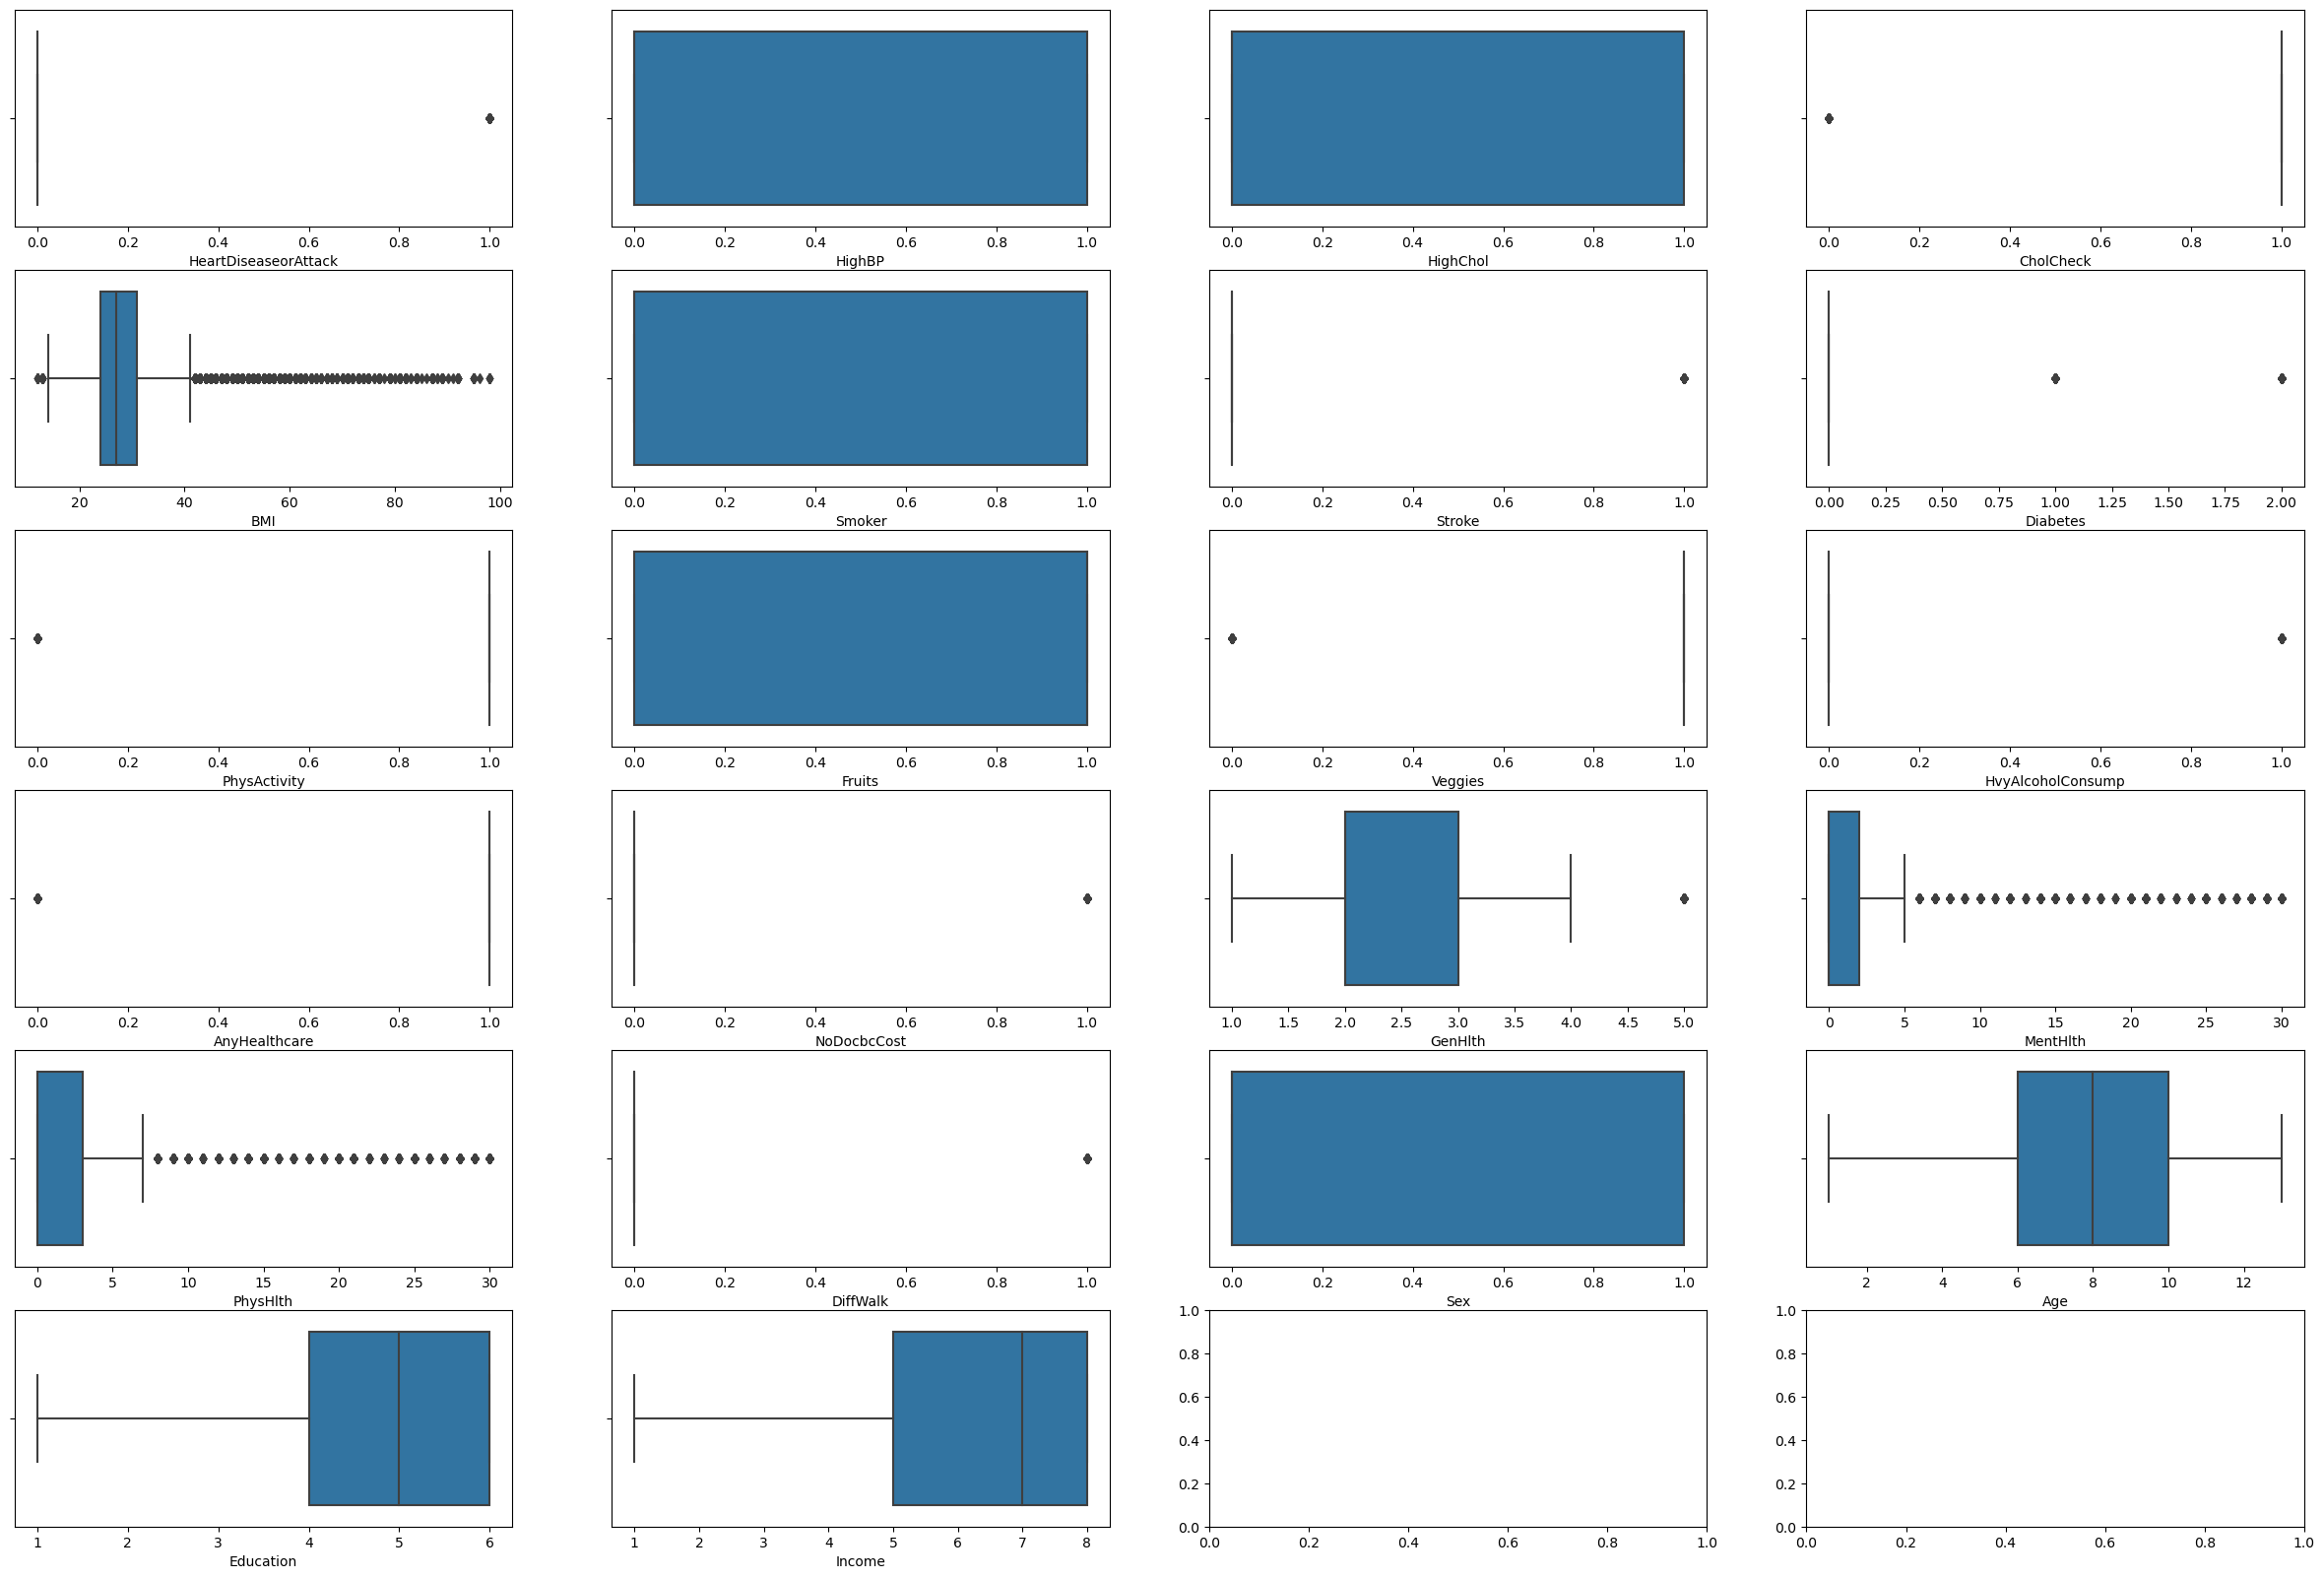

In [7]:
f,a=subplots(nrows=6,ncols=4,figsize=(30,20))
j,k=0,0
for i in s.columns:
    boxplot(s[i],ax=a[j,k])
    k=k+1
    if k==4:
        k=0
        j=j+1

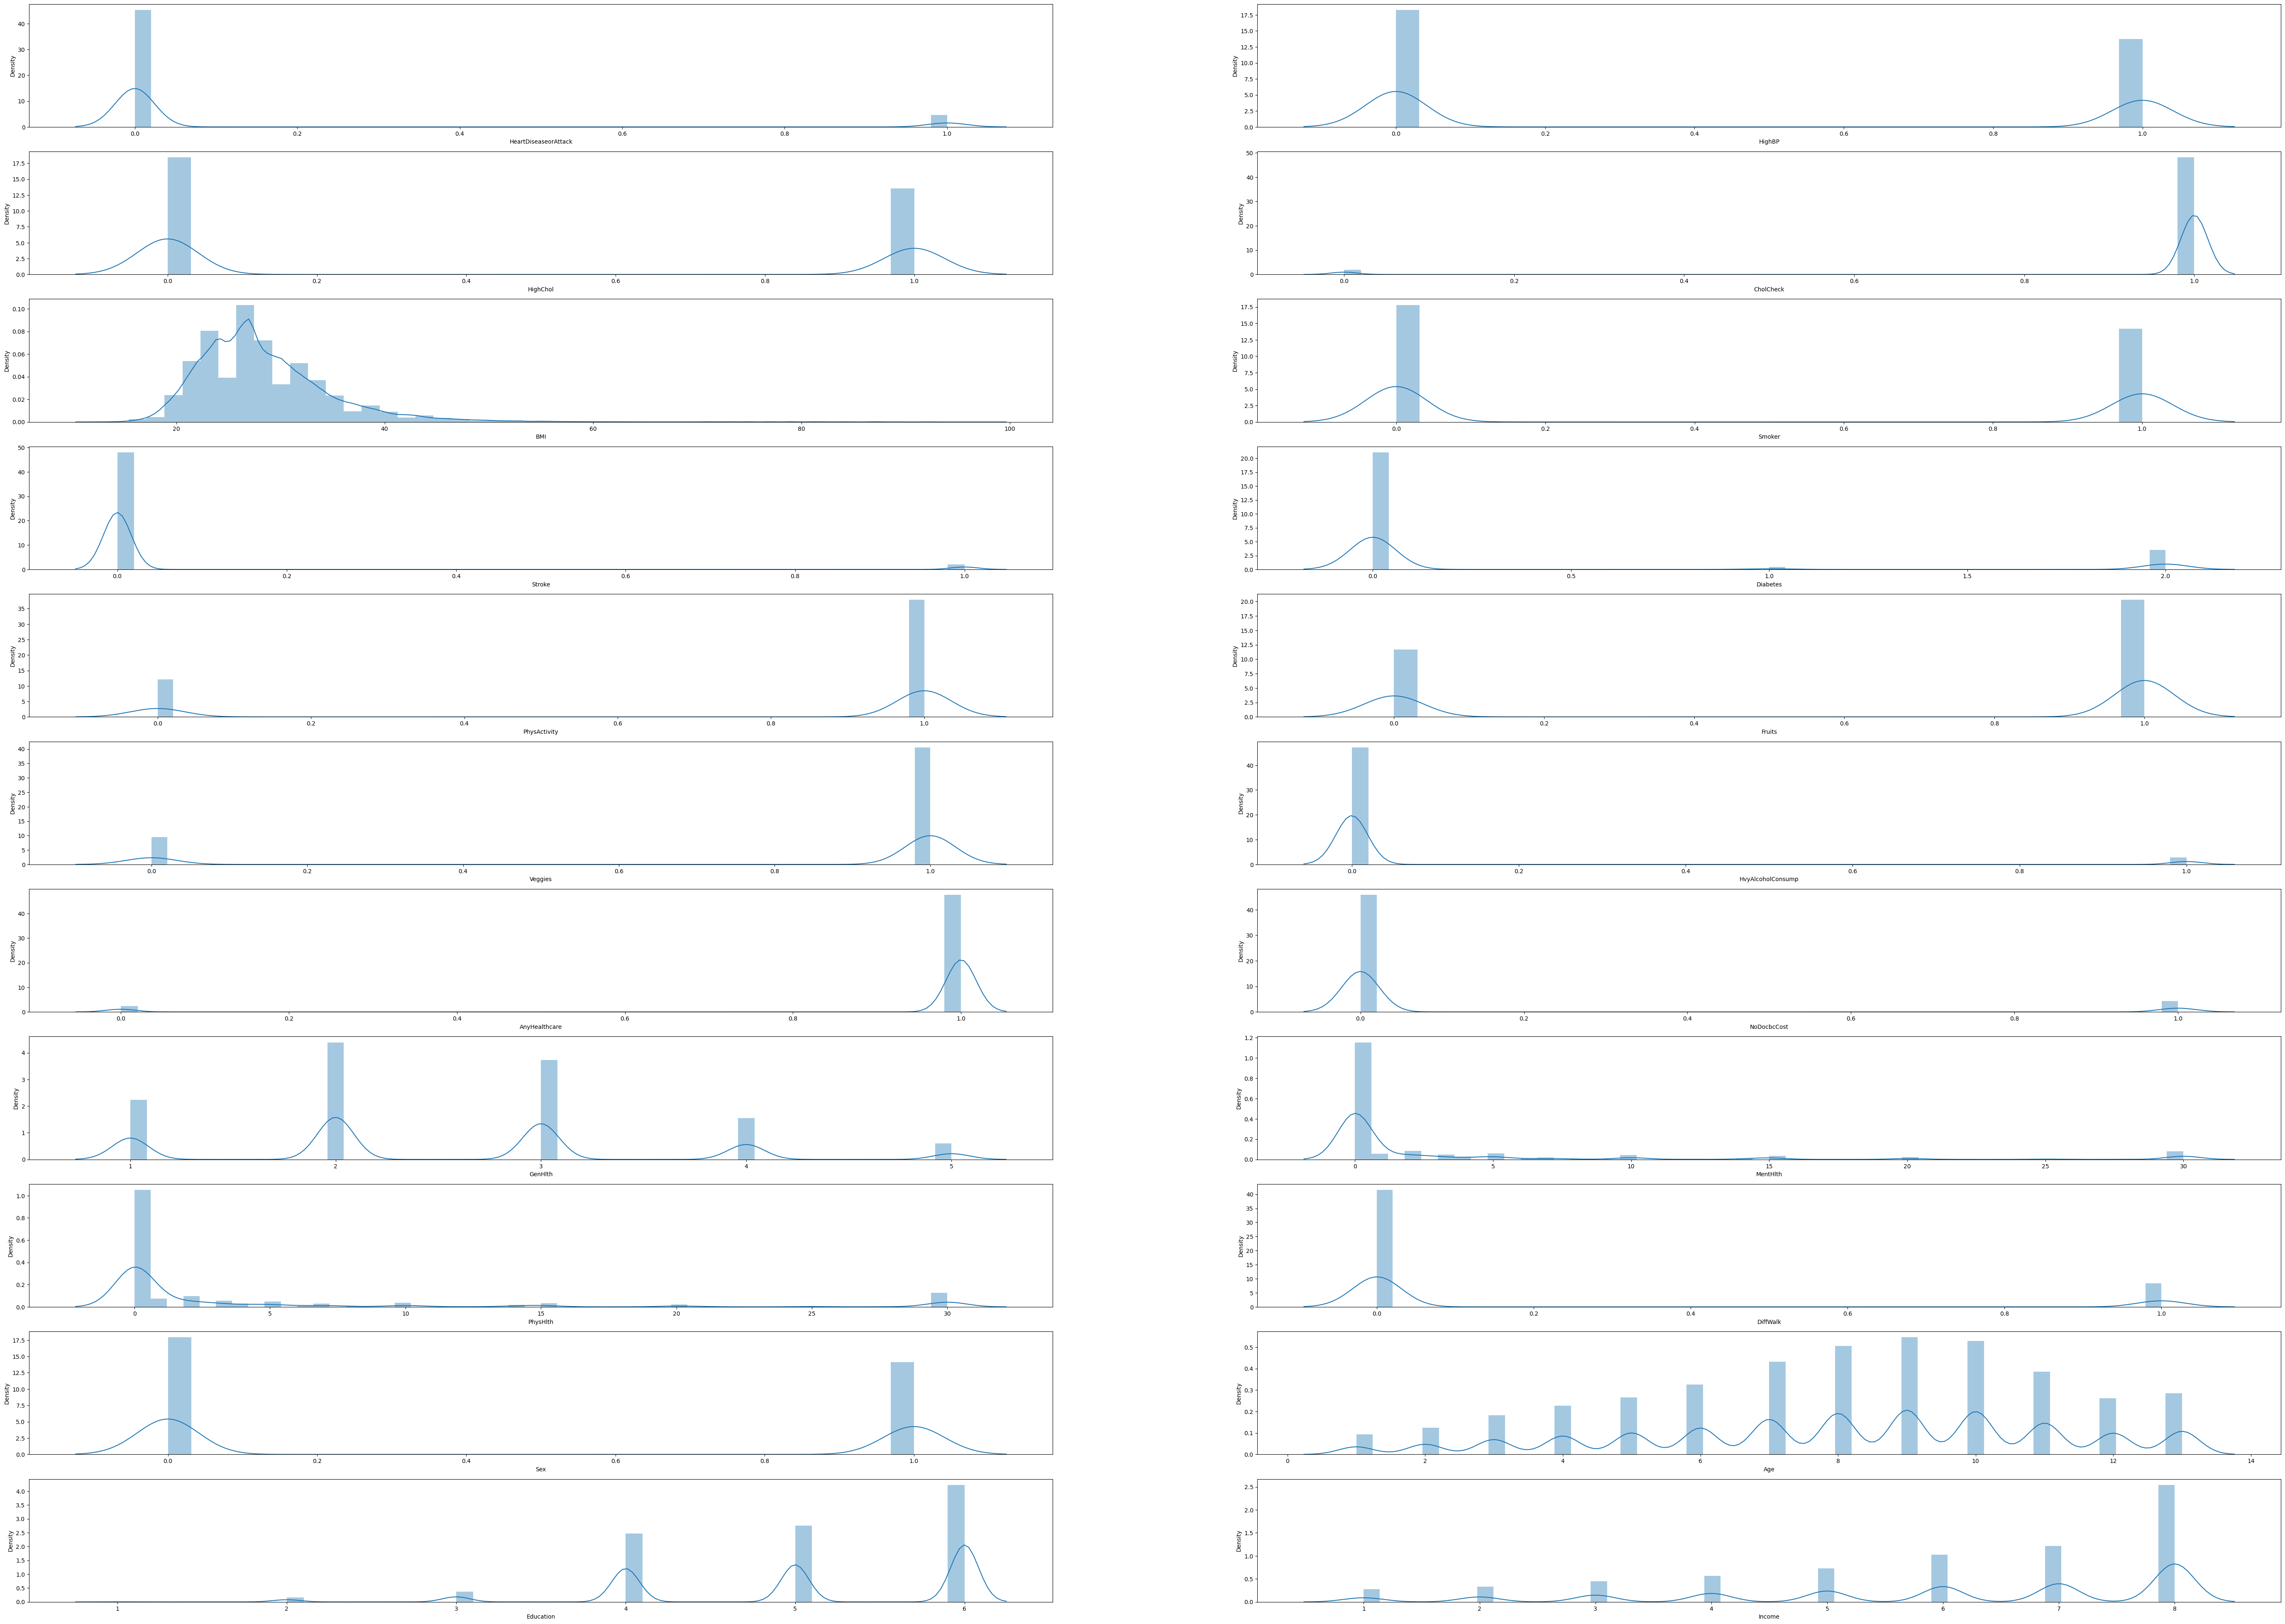

In [8]:
f,a=subplots(nrows=11,ncols=2,figsize=(70,50))
j,k=0,0
for i in s.columns:
    distplot(s[i],ax=a[j,k])
    k=k+1
    if k==2:
        k=0
        j=j+1

In [9]:
low,high=per(s.BMI)

In [10]:
s=s[(s.BMI>low) & (s.BMI<high)]

In [11]:
low,high=per(s.Age)

In [12]:
s=s[(s.Age>low) & (s.Age<high)]

In [13]:
s

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [14]:
s.MentHlth.value_counts()

0.0     170288
2.0      12567
30.0     11093
5.0       8594
1.0       8221
3.0       7034
10.0      5951
15.0      5099
4.0       3572
20.0      3097
7.0       2952
14.0      1091
25.0      1058
6.0        936
8.0        604
12.0       375
28.0       309
21.0       208
29.0       147
9.0         89
18.0        86
16.0        79
27.0        75
22.0        56
17.0        52
26.0        41
13.0        39
11.0        37
23.0        37
24.0        30
19.0        16
Name: MentHlth, dtype: int64

In [15]:
s.MentHlth.value_counts()

0.0     170288
2.0      12567
30.0     11093
5.0       8594
1.0       8221
3.0       7034
10.0      5951
15.0      5099
4.0       3572
20.0      3097
7.0       2952
14.0      1091
25.0      1058
6.0        936
8.0        604
12.0       375
28.0       309
21.0       208
29.0       147
9.0         89
18.0        86
16.0        79
27.0        75
22.0        56
17.0        52
26.0        41
13.0        39
11.0        37
23.0        37
24.0        30
19.0        16
Name: MentHlth, dtype: int64

In [16]:
s.shape

(243833, 22)

In [17]:
mu=mutual_info_classif(s.drop('Stroke',axis=1),s['Stroke'])
mu=Series(mu)
mu.index=s.columns[:21]

In [18]:
mu.sort_values()

Veggies                 0.000729
AnyHealthcare           0.000850
BMI                     0.003080
GenHlth                 0.003125
Stroke                  0.006193
DiffWalk                0.010976
MentHlth                0.011394
Smoker                  0.012467
PhysHlth                0.012784
HighChol                0.012801
HeartDiseaseorAttack    0.013277
Sex                     0.013572
HighBP                  0.017763
Education               0.020403
Age                     0.020699
PhysActivity            0.022375
NoDocbcCost             0.027836
Diabetes                0.034763
Fruits                  0.037074
HvyAlcoholConsump       0.050419
CholCheck               0.051386
dtype: float64

In [19]:
s1=s[(s.PhysHlth==0) & (s.MentHlth==0)]

In [20]:
s2=s[(s.PhysHlth>0) & (s.MentHlth>0)]

In [21]:
s3=s[(s.PhysHlth==0) & (s.MentHlth>0)]

In [22]:
s4=s[(s.PhysHlth>0) & (s.MentHlth==0)]

In [23]:
s1.shape[0]+s2.shape[0]+s3.shape[0]+s4.shape[0]

243833

In [24]:
s1.drop(['PhysHlth','MentHlth'],axis=1,inplace=True)
s3.drop(['PhysHlth'],axis=1,inplace=True)
s4.drop(['MentHlth'],axis=1,inplace=True)

In [25]:
s2.PhysHlth.value_counts()

30.0    9223
2.0     5675
1.0     4454
3.0     3392
5.0     3182
10.0    2560
15.0    2551
20.0    1838
4.0     1780
7.0     1740
14.0     955
25.0     799
6.0      535
8.0      361
28.0     320
12.0     306
21.0     250
29.0     121
18.0      98
9.0       88
27.0      58
16.0      56
17.0      53
22.0      47
26.0      47
24.0      46
13.0      42
23.0      29
11.0      19
19.0      11
Name: PhysHlth, dtype: int64

In [26]:
s2.MentHlth.value_counts()

30.0    7959
2.0     5468
5.0     4407
1.0     3839
10.0    3466
3.0     3277
15.0    3246
20.0    2156
4.0     1760
7.0     1645
25.0     770
14.0     638
6.0      540
8.0      345
12.0     255
28.0     204
21.0     145
29.0      85
9.0       59
18.0      59
27.0      52
16.0      52
22.0      44
17.0      38
26.0      26
11.0      25
13.0      23
23.0      23
24.0      19
19.0      11
Name: MentHlth, dtype: int64

In [27]:
s1.HeartDiseaseorAttack.value_counts()

0.0    114508
1.0      8560
Name: HeartDiseaseorAttack, dtype: int64

# OVER SAMPLING

In [28]:
s11,s12=SMOTE().fit_resample(s1.drop('Stroke',axis=1),s1['Stroke'])

In [29]:
s11,s12=DataFrame(s11),DataFrame(s12)

In [30]:
s11.Sex.value_counts()

1.000000    106703
0.000000    101550
0.914701         1
0.650983         1
0.943253         1
             ...  
0.693100         1
0.042914         1
0.967561         1
0.908908         1
0.437614         1
Name: Sex, Length: 31599, dtype: int64

In [31]:
s11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239850 entries, 0 to 239849
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  239850 non-null  float64
 1   HighBP                239850 non-null  float64
 2   HighChol              239850 non-null  float64
 3   CholCheck             239850 non-null  float64
 4   BMI                   239850 non-null  float64
 5   Smoker                239850 non-null  float64
 6   Diabetes              239850 non-null  float64
 7   PhysActivity          239850 non-null  float64
 8   Fruits                239850 non-null  float64
 9   Veggies               239850 non-null  float64
 10  HvyAlcoholConsump     239850 non-null  float64
 11  AnyHealthcare         239850 non-null  float64
 12  NoDocbcCost           239850 non-null  float64
 13  GenHlth               239850 non-null  float64
 14  DiffWalk              239850 non-null  float64
 15  

In [32]:
for i in s11.columns:
    if i=='Age' or i=='GenHlth' or i=='Education' or i=='Income' or i=='BMI':
        continue
    else:
        s11[s11[i]>0.5].i=1
        s11[s11[i]<=0.5].i=0

In [33]:
s11.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [34]:
s11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239850 entries, 0 to 239849
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  239850 non-null  float64
 1   HighBP                239850 non-null  float64
 2   HighChol              239850 non-null  float64
 3   CholCheck             239850 non-null  float64
 4   BMI                   239850 non-null  float64
 5   Smoker                239850 non-null  float64
 6   Diabetes              239850 non-null  float64
 7   PhysActivity          239850 non-null  float64
 8   Fruits                239850 non-null  float64
 9   Veggies               239850 non-null  float64
 10  HvyAlcoholConsump     239850 non-null  float64
 11  AnyHealthcare         239850 non-null  float64
 12  NoDocbcCost           239850 non-null  float64
 13  GenHlth               239850 non-null  float64
 14  DiffWalk              239850 non-null  float64
 15  

In [35]:
s11['Age']=StandardScaler().fit_transform(array(s11['Age']).reshape(-1,1))
s11['BMI']=StandardScaler().fit_transform(array(s11['BMI']).reshape(-1,1))

In [36]:
s11.Education=round(s11.Education)
s11.Income=round(s11.Income)

In [37]:
i1=s11[s11.duplicated()].index
s11.drop(i1,axis=0,inplace=True)
s12.drop(i1,axis=0,inplace=True)

In [38]:
mu=mutual_info_classif(s11,s12)

In [39]:
mu=Series(mu)
mu.index=s11.columns

<AxesSubplot:>

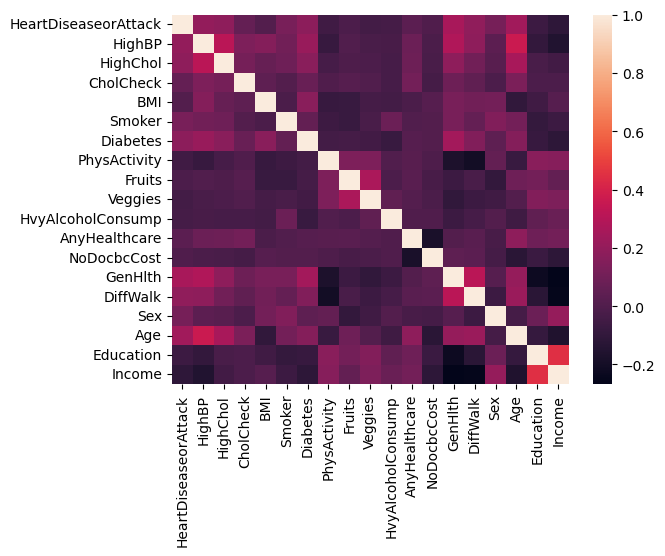

In [40]:
heatmap(s11.corr())

In [41]:
mu

HeartDiseaseorAttack    0.102557
HighBP                  0.160975
HighChol                0.132343
CholCheck               0.044881
BMI                     0.198226
Smoker                  0.112454
Diabetes                0.036209
PhysActivity            0.096062
Fruits                  0.110700
Veggies                 0.093253
HvyAlcoholConsump       0.034578
AnyHealthcare           0.051610
NoDocbcCost             0.030537
GenHlth                 0.207621
DiffWalk                0.079150
Sex                     0.103382
Age                     0.249748
Education               0.009971
Income                  0.023851
dtype: float64

In [42]:
s111=s11.drop(['Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost'],axis=1)

In [43]:
m111=m11=cross_val_score(RandomForestClassifier(),s111,s12,cv=5)

In [44]:
m111.mean()

0.9852058477340007

In [45]:
m51=cross_val_score(ExtraTreesClassifier(),s111,s12,cv=5)

In [46]:
m51

array([0.95944886, 0.99529173, 0.99483013, 0.99480693, 0.9955455 ])

In [47]:
mean(m51)

0.9879846305042287

In [48]:
m52=cross_val_score(ExtraTreesClassifier(),s11,s12,cv=5)

In [49]:
print(m52)
print(mean(m52))

[0.96027973 0.99598412 0.99582256 0.99591479 0.99646871]
0.9888939825678648


In [50]:
s21,s22=SMOTE().fit_resample(s2.drop('Stroke',axis=1),s2['Stroke'])

In [51]:
s21

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.0,1.000000,1.0,40.000000,1.000000,0.00000,0.00000,0.000000,1.000000,...,1.0,0.0,5.000000,18.000000,15.00000,1.000000,0.000000,9.000000,4.000000,3.000000
1,0.000000,1.0,1.000000,1.0,28.000000,0.000000,0.00000,0.00000,1.000000,0.000000,...,1.0,1.0,5.000000,30.000000,30.00000,1.000000,0.000000,9.000000,4.000000,8.000000
2,1.000000,1.0,1.000000,1.0,30.000000,1.000000,2.00000,0.00000,1.000000,1.000000,...,1.0,0.0,5.000000,30.000000,30.00000,1.000000,0.000000,9.000000,5.000000,1.000000
3,0.000000,0.0,1.000000,1.0,33.000000,1.000000,0.00000,1.00000,0.000000,1.000000,...,1.0,1.0,4.000000,30.000000,28.00000,0.000000,0.000000,4.000000,6.000000,2.000000
4,0.000000,1.0,1.000000,1.0,38.000000,1.000000,0.00000,0.00000,1.000000,1.000000,...,1.0,0.0,5.000000,15.000000,30.00000,1.000000,0.000000,13.000000,2.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75221,0.000000,1.0,1.000000,1.0,22.000000,0.000000,0.48364,0.75818,1.000000,0.241820,...,1.0,0.0,2.241820,6.516360,6.51636,0.000000,0.000000,13.000000,4.000000,3.516360
75222,0.157069,1.0,0.157069,1.0,29.000000,1.000000,0.00000,1.00000,0.157069,1.000000,...,1.0,0.0,4.000000,3.314138,10.00000,1.000000,0.157069,9.685862,5.157069,2.157069
75223,0.236613,1.0,0.236613,1.0,36.473226,1.000000,2.00000,1.00000,1.000000,1.000000,...,1.0,0.0,5.000000,30.000000,30.00000,1.000000,0.236613,6.236613,2.473226,2.000000
75224,0.000000,1.0,0.443981,1.0,29.112039,0.443981,2.00000,1.00000,0.443981,0.443981,...,1.0,0.0,3.556019,1.443981,2.00000,0.556019,1.000000,10.556019,6.000000,7.556019


In [52]:
for i in s21.columns:
    if i=='Age' or i=='GenHlth' or i=='Education' or i=='Income' or i=='BMI' or i=='PhysHlth' or i=='MentHlth':
        continue
    else:
        s21[s21[i]>0.5].i=1
        s21[s21[i]<=0.5].i=0

In [53]:
s21.MentHlth=round(s21.MentHlth)
s21.PhysHlth=round(s21.PhysHlth)

In [54]:
s21.Age=round(s21.Age)
s21.BMI=round(s21.BMI)
s21.Education=round(s21.Education)
s21.Income=round(s21.Income)

In [55]:
i2=s21[s21.duplicated()].index
s21.drop(i2,axis=0,inplace=True)
s22.drop(i2,axis=0,inplace=True)

In [56]:
mu=mutual_info_classif(s21,s22)
mu=Series(mu)
mu.index=s21.columns

In [57]:
mu

HeartDiseaseorAttack    0.197861
HighBP                  0.182382
HighChol                0.182947
CholCheck               0.026417
BMI                     0.003927
Smoker                  0.169355
Diabetes                0.114994
PhysActivity            0.163785
Fruits                  0.163631
Veggies                 0.136750
HvyAlcoholConsump       0.033438
AnyHealthcare           0.040498
NoDocbcCost             0.103809
GenHlth                 0.286832
MentHlth                0.025677
PhysHlth                0.052822
DiffWalk                0.195572
Sex                     0.152115
Age                     0.060150
Education               0.024444
Income                  0.047472
dtype: float64

In [58]:
m21=cross_val_score(RandomForestClassifier(),s21,s22,cv=5)

In [59]:
mean(m21)

0.9568675792864211

In [60]:
s211=s21.drop(['CholCheck','BMI','HvyAlcoholConsump','AnyHealthcare','MentHlth','PhysHlth','Age'],axis=1)

In [61]:
m211=cross_val_score(RandomForestClassifier(),s211,s22,cv=5)

In [62]:
mean(m211)

0.946270767648676

In [63]:
s221=SelectKBest(mutual_info_classif).fit_transform(s21,s22)

In [64]:
s221=DataFrame(s221)

In [65]:
m221=cross_val_score(RandomForestClassifier(),s221,s22,cv=5)

In [66]:
mean(m221)

0.9511360276157836

<AxesSubplot:>

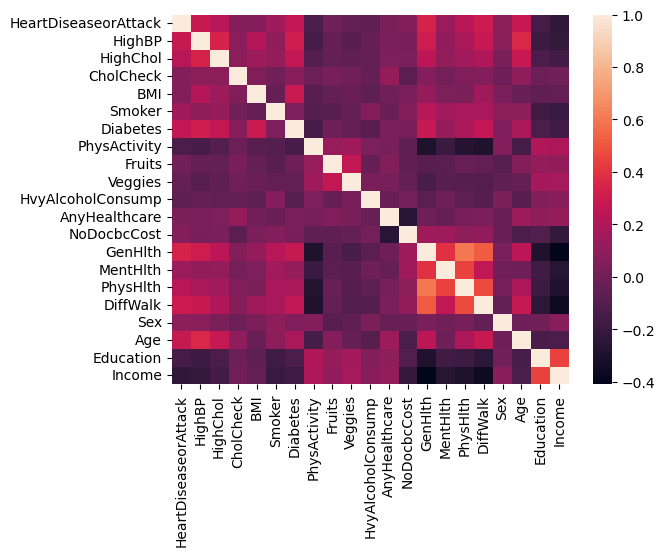

In [67]:
heatmap(s21.corr())

In [68]:
m23=cross_val_score(ExtraTreesClassifier(),s21,s22,cv=5)
m23

array([0.83912029, 0.99346884, 0.99480173, 0.99273527, 0.99360171])

In [69]:
mean(m23)

0.9627455693032564

In [70]:
m24=cross_val_score(ExtraTreesClassifier(),s211,s22,cv=5)
m24

array([0.80259913, 0.98047318, 0.98133955, 0.97973874, 0.97840576])

In [71]:
mean(m24)

0.9445112715027632

In [72]:
s3.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [73]:
s31,s32=SMOTE().fit_resample(s3.drop('Stroke',axis=1),s3['Stroke'])

In [74]:
s32.value_counts()

0.0    32164
1.0    32164
Name: Stroke, dtype: int64

In [75]:
i3=s31[s31.duplicated()].index
s31.drop(i3,axis=0,inplace=True)
s32.drop(i3,axis=0,inplace=True)

In [76]:
for i in s31.columns:
    if i=='Age' or i=='GenHlth' or i=='Education' or i=='Income' or i=='BMI' or i=='MentHlth':
        continue
    else:
        s31[s31[i]>0.5].i=1
        s31[s31[i]<=0.5].i=0

In [77]:
s31.MentHlth=round(s31.MentHlth)
s31.Age=round(s31.Age)
s31.BMI=round(s31.BMI)
s31.Education=round(s31.Education)
s31.Income=round(s31.Income)

In [78]:
mu=mutual_info_classif(s31,s32)
mu=Series(mu)
mu.index=s31.columns

In [79]:
mu.sort_values()

BMI                     0.004548
MentHlth                0.020414
Education               0.024187
CholCheck               0.037275
Income                  0.039067
AnyHealthcare           0.041379
HvyAlcoholConsump       0.056541
NoDocbcCost             0.064817
Diabetes                0.091095
Age                     0.107663
Veggies                 0.128893
PhysActivity            0.132724
DiffWalk                0.132760
HeartDiseaseorAttack    0.157595
Fruits                  0.163411
Sex                     0.168208
Smoker                  0.172065
HighChol                0.181444
HighBP                  0.222906
GenHlth                 0.294180
dtype: float64

In [80]:
s311=s31.drop(['BMI','MentHlth','CholCheck','AnyHealthcare','HvyAlcoholConsump','NoDocbcCost'],axis=1)

In [81]:
m311=cross_val_score(RandomForestClassifier(),s311,s32,cv=5)

In [82]:
m311

array([0.94051928, 0.99575104, 0.9949642 , 0.99590841, 0.99582973])

In [83]:
mean(m311)

0.98459453113107

In [84]:
m31=cross_val_score(RandomForestClassifier(),s31,s32,cv=5)

In [85]:
m31

array([0.94398112, 0.99952789, 0.99913447, 0.99921316, 0.99929184])

In [86]:
mean(m31)

0.9882296957885399

In [87]:
m33=cross_val_score(ExtraTreesClassifier(),s31,s32,cv=5)
m33

array([0.97537372, 0.99803289, 0.99834763, 0.99874105, 0.99866237])

In [88]:
mean(m33)

0.9938315308250611

In [89]:
s41,s42=SMOTE().fit_resample(s4.drop('Stroke',axis=1),s4['Stroke'])

In [90]:
i4=s41[s41.duplicated()].index
s41.drop(i4,axis=0,inplace=True)
s42.drop(i4,axis=0,inplace=True)

In [91]:
for i in s41.columns:
    if i=='Age' or i=='GenHlth' or i=='Education' or i=='Income' or i=='BMI':
        continue
    else:
        s41[s41[i]>0.5].i=1
        s41[s41[i]<=0.5].i=0

In [92]:
s41.Age=round(s41.Age)
s31.BMI=round(s41.BMI)
s41.Education=round(s41.Education)
s41.Income=round(s41.Income)

In [93]:
mu=mutual_info_classif(s41,s42)
mu=Series(mu)
mu.index=s41.columns

In [94]:
i5=mu.sort_values()[:8].index

In [95]:
s411=s41.drop(i5,axis=1)

In [96]:
m411=cross_val_score(RandomForestClassifier(),s411,s42,cv=5)

In [97]:
m411

array([0.84063157, 0.98608429, 0.98727706, 0.98483472, 0.98585709])

In [98]:
mean(m411)

0.9569369461369194

In [99]:
m41=cross_val_score(RandomForestClassifier(),s41,s42,cv=5)
m41

array([0.84636792, 0.99647847, 0.99659207, 0.99568329, 0.99681927])

In [100]:
mean(m41)

0.9663882043857566

In [101]:
m42=cross_val_score(EasyEnsembleClassifier(),s41,s42,cv=5)
m42

array([0.82115068, 0.96592071, 0.96387595, 0.95904805, 0.96535272])

In [102]:
m43=cross_val_score(ExtraTreesClassifier(),s41,s42,cv=5)
m43

array([0.88612484, 0.99426332, 0.99449051, 0.99375213, 0.99437692])

In [103]:
mean(m43)

0.9726015435097499

In [104]:
x_train1,x_test1,y_train1,y_test1=train_test_split(s11,s12,stratify=s12,test_size=0.2)

In [106]:
x_train2,x_test2,y_train2,y_test2=train_test_split(s21,s22,stratify=s22,test_size=0.2)

In [107]:
x_train3,x_test3,y_train3,y_test3=train_test_split(s311,s32,stratify=s32,test_size=0.2)

In [108]:
x_train4,x_test4,y_train4,y_test4=train_test_split(s41,s42,stratify=s42,test_size=0.2)

In [109]:
model2=ExtraTreesClassifier().fit(x_train2,y_train2)

In [110]:
model3=RandomForestClassifier().fit(x_train3,y_train3)

In [111]:
model4=ExtraTreesClassifier().fit(x_train4,y_train4)

In [112]:
model1=ExtraTreesClassifier().fit(x_train1,y_train1)

In [113]:
s11.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [114]:
s21.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [115]:
s31.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [116]:
s41.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [131]:
v1=TSNE(n_components=2).fit_transform(s111[:10000],s12[:10000])
v1=DataFrame(v1)

<AxesSubplot:xlabel='0', ylabel='1'>

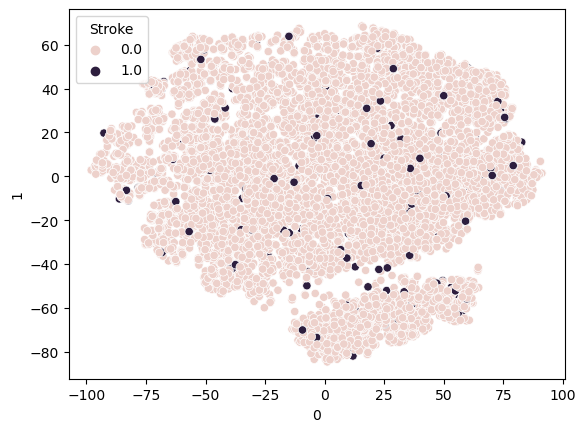

In [132]:
scatterplot(v1[0],v1[1],hue=s12['Stroke'])

In [133]:
v2=TSNE(n_components=2).fit_transform(s211[:10000],s22[:10000])
v2=DataFrame(v2)

<AxesSubplot:xlabel='0', ylabel='1'>

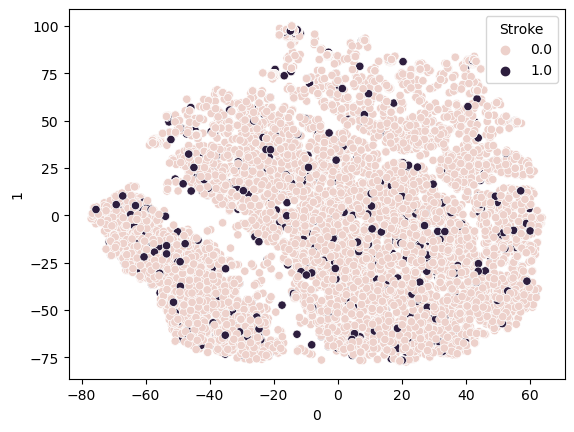

In [134]:
scatterplot(v2[0],v2[1],hue=s22)

In [135]:
v3=TSNE(n_components=2).fit_transform(s311[:10000],s32[:10000])
v3=DataFrame(v3)

<AxesSubplot:xlabel='0', ylabel='1'>

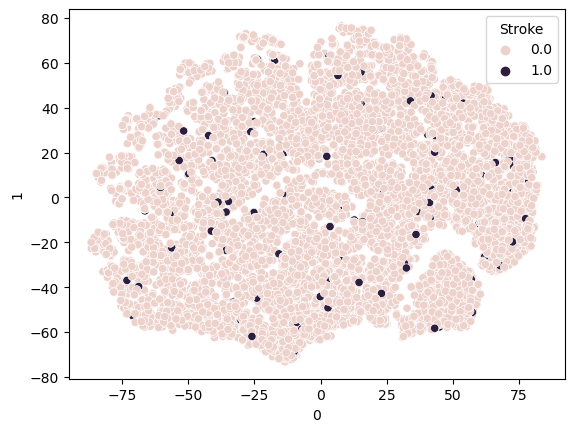

In [136]:
scatterplot(v3[0],v3[1],hue=s32)

In [137]:
v4=TSNE(n_components=2).fit_transform(s411[:10000],s42[:10000])
v4=DataFrame(v4)

<AxesSubplot:xlabel='0', ylabel='1'>

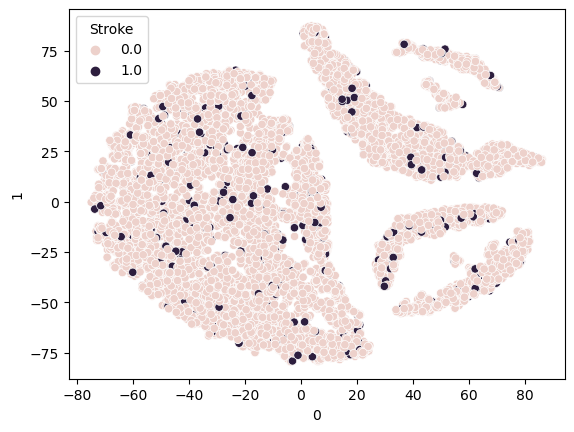

In [138]:
scatterplot(v4[0],v4[1],hue=s42)

In [117]:
y_pred1=model1.predict(x_test1)
y_pred2=model2.predict(x_test2)
y_pred3=model3.predict(x_test3)
y_pred4=model4.predict(x_test4)

In [118]:
print(classification_report(y_pred1,y_test1))
print('----------------------------------------')
print(classification_report(y_pred2,y_test2))
print('----------------------------------------')
print(classification_report(y_pred3,y_test3))
print('----------------------------------------')
print(classification_report(y_pred4,y_test4))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     19693
         1.0       0.99      1.00      0.99     23635

    accuracy                           0.99     43328
   macro avg       0.99      0.99      0.99     43328
weighted avg       0.99      0.99      0.99     43328

----------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      7893
         1.0       0.94      0.99      0.97      7112

    accuracy                           0.97     15005
   macro avg       0.97      0.97      0.97     15005
weighted avg       0.97      0.97      0.97     15005

----------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      6419
         1.0       0.97      1.00      0.98      6291

    accuracy                           0.98     12710
   macro avg       0.98      0.98      0.98   

<AxesSubplot:>

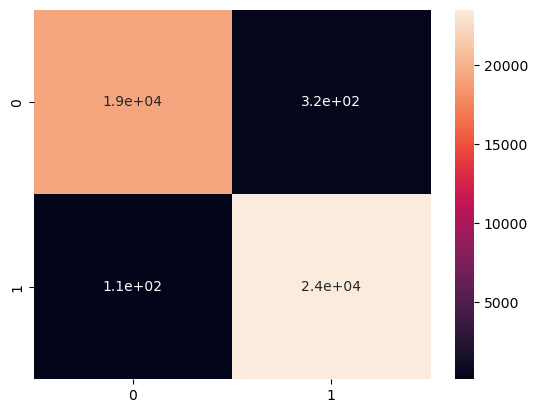

In [119]:
heatmap(confusion_matrix(y_pred1,y_test1),annot=True)

<AxesSubplot:>

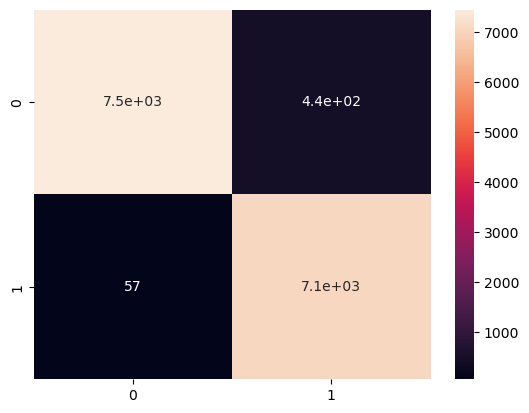

In [120]:
heatmap(confusion_matrix(y_pred2,y_test2),annot=True)

<AxesSubplot:>

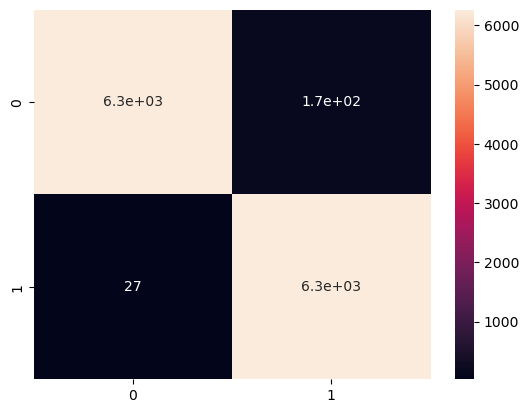

In [121]:
heatmap(confusion_matrix(y_pred3,y_test3),annot=True)

<AxesSubplot:>

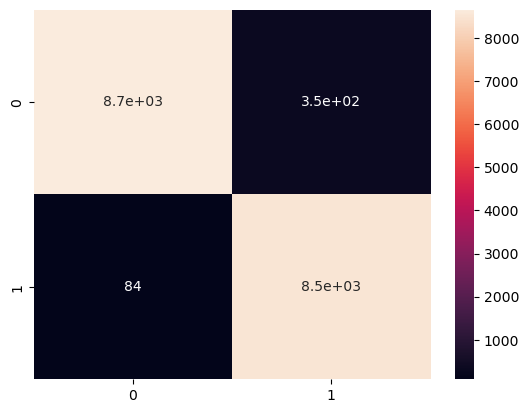

In [122]:
heatmap(confusion_matrix(y_pred4,y_test4),annot=True)

In [139]:
print(accuracy_score(y_pred1,y_test1))

0.9900526218611522


In [140]:
print(accuracy_score(y_pred2,y_test2))

0.966811062979007


In [141]:
print(accuracy_score(y_pred3,y_test3))

0.9846577498033044


In [142]:
print(accuracy_score(y_pred4,y_test4))

0.9753507127846879
